## GRU, Word Embeddings

In [49]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.layers import Dropout
from keras.preprocessing import sequence
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
from gensim.models import KeyedVectors


In [51]:
from gensim.scripts.glove2word2vec import glove2word2vec

In [52]:
glove_input_file = "glove.6B.100d.txt"

In [53]:
word2vec_output_file = "word2vec.txt"

In [54]:
glove2word2vec(glove_input_file,word2vec_output_file)

(400000, 100)

In [55]:
model = KeyedVectors.load_word2vec_format(word2vec_output_file,binary=False)

In [56]:
embedding_index = dict()
f = open('glove.6B.100d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.array(values[1:],dtype='float32')
    embedding_index[word] = coefs
f.close()
print("Len of loaded word vectors: ",len(embedding_index))

Len of loaded word vectors:  400000


In [57]:
result = model.most_similar(positive=["woman","king"],negative=['man'],topn=1)
print(result)

[('queen', 0.7698541283607483)]


## Load Quora Questions dataset and Cleaning data

In [58]:
df = pd.read_csv("quora_duplicate_questions.tsv",delimiter='\t',encoding='utf-8')

In [59]:
df2 = df.copy()

In [60]:
df.drop(['id','qid1','qid2'],axis=1,inplace=True)

In [61]:
df['question1'] = df['question1'].apply(lambda s: " ".join(s1.lower() for s1 in str(s).split()))

In [62]:
df['question2'] = df['question2'].apply(lambda s: " ".join(s1.lower() for s1 in str(s).split()))

In [63]:
df['question1'] = df['question1'].str.replace('[^\w\s]','')
df['question2'] = df['question2'].str.replace(r'[^\w\s]','')

In [64]:
# function to clean data
import string
import itertools 
import re
from nltk.stem import WordNetLemmatizer
from string import punctuation

stops = ['the','a','an','and','but','if','or','because','as','what','which','this','that','these','those','then',
              'just','so','than','such','both','through','about','for','is','of','while','during','to','What','Which',
              'Is','If','While','This']
# punct = list(string.punctuation)
# punct.append("''")
# punct.append(":")
# punct.append("...")
# punct.append("@")
# punct.append('""')
def cleanData(text, lowercase = False, remove_stops = False, stemming = False, lemmatization = False):
    txt = str(text)
    
    # Replace apostrophes with standard lexicons
    txt = txt.replace("isn't", "is not")
    txt = txt.replace("aren't", "are not")
    txt = txt.replace("ain't", "am not")
    txt = txt.replace("won't", "will not")
    txt = txt.replace("didn't", "did not")
    txt = txt.replace("shan't", "shall not")
    txt = txt.replace("haven't", "have not")
    txt = txt.replace("hadn't", "had not")
    txt = txt.replace("hasn't", "has not")
    txt = txt.replace("don't", "do not")
    txt = txt.replace("wasn't", "was not")
    txt = txt.replace("weren't", "were not")
    txt = txt.replace("doesn't", "does not")
    txt = txt.replace("gotta","got to")
    txt = txt.replace("quikly","quickly")
    txt = txt.replace("'s", " is")
    txt = txt.replace("'re", " are")
    txt = txt.replace("'m", " am")
    txt = txt.replace("'d", " would")
    txt = txt.replace("'ll", " will")
    
    # More cleaning
    txt = re.sub(r"review", "", txt)
    txt = re.sub(r"Review", "", txt)
    txt = re.sub(r"TripAdvisor", "", txt)
    txt = re.sub(r"reviews", "", txt)
    txt = re.sub(r"Hotel", "", txt)
    txt = re.sub(r"what's", "", txt)
    txt = re.sub(r"What's", "", txt)
    txt = re.sub(r"\'s", " ", txt)
    txt = txt.replace("pic", "picture")
    txt = re.sub(r"\'ve", " have ", txt)
    txt = re.sub(r"can't", "cannot ", txt)
    txt = re.sub(r"n't", " not ", txt)
    txt = re.sub(r"I'm", "I am", txt)
    txt = re.sub(r" m ", " am ", txt)
    txt = re.sub(r"\'re", " are ", txt)
    txt = re.sub(r"\'d", " would ", txt)
    txt = re.sub(r"\'ll", " will ", txt)
    txt = re.sub(r"60k", " 60000 ", txt)
    txt = re.sub(r" e g ", " eg ", txt)
    txt = re.sub(r" b g ", " bg ", txt)
    txt = re.sub(r"\0s", "0", txt)
    txt = re.sub(r" 9 11 ", "911", txt)
    txt = re.sub(r"e-mail", "email", txt)
    txt = re.sub(r"\s{2,}", " ", txt)
    txt = re.sub(r"quikly", "quickly", txt)
    txt = re.sub(r" usa ", " America ", txt)
    txt = re.sub(r" USA ", " America ", txt)
    txt = re.sub(r" u s ", " America ", txt)
    txt = re.sub(r" uk ", " England ", txt)
    txt = re.sub(r" UK ", " England ", txt)
    txt = re.sub(r"india", "India", txt)
    txt = re.sub(r"switzerland", "Switzerland", txt)
    txt = re.sub(r"china", "China", txt)
    txt = re.sub(r"chinese", "Chinese", txt) 
    txt = re.sub(r"imrovement", "improvement", txt)
    txt = re.sub(r"intially", "initially", txt)
    txt = re.sub(r"quora", "Quora", txt)
    txt = re.sub(r" dms ", "direct messages ", txt)  
    txt = re.sub(r"demonitization", "demonetization", txt) 
    txt = re.sub(r"actived", "active", txt)
    txt = re.sub(r"kms", " kilometers ", txt)
    txt = re.sub(r"KMs", " kilometers ", txt)
    txt = re.sub(r" cs ", " computer science ", txt) 
    txt = re.sub(r" upvotes ", " up votes ", txt)
    txt = re.sub(r" iPhone ", " phone ", txt)
    txt = re.sub(r"\0rs ", " rs ", txt) 
    txt = re.sub(r"calender", "calendar", txt)
    txt = re.sub(r"ios", "operating system", txt)
    txt = re.sub(r"gps", "GPS", txt)
    txt = re.sub(r"gst", "GST", txt)
    txt = re.sub(r"programing", "programming", txt)
    txt = re.sub(r"bestfriend", "best friend", txt)
    txt = re.sub(r"dna", "DNA", txt)
    txt = re.sub(r"III", "3", txt) 
    txt = re.sub(r"the US", "America", txt)
    txt = re.sub(r"Astrology", "astrology", txt)
    txt = re.sub(r"Method", "method", txt)
    txt = re.sub(r"Find", "find", txt) 
    txt = re.sub(r"banglore", "Banglore", txt)
    txt = re.sub(r" J K ", " JK ", txt)

    # Emoji replacement
    txt = re.sub(r':\)',r' Happy ',txt)
    txt = re.sub(r':D',r' Happy ',txt)
    txt = re.sub(r':P',r' Happy ',txt)
    txt = re.sub(r':\(',r' Sad ',txt)
    
    # Remove urls and emails
    txt = re.sub(r'^https?:\/\/.*[\r\n]*', ' ', txt, flags=re.MULTILINE)
    txt = re.sub(r'[\w\.-]+@[\w\.-]+', ' ', txt, flags=re.MULTILINE)
    
    # Remove punctuation from text
    txt = ''.join([c for c in text if c not in punctuation])
#     txt = txt.replace(".", " ")
#     txt = txt.replace(":", " ")
#     txt = txt.replace("!", " ")
#     txt = txt.replace("&", " ")
#     txt = txt.replace("#", " ")
    
    # Remove all symbols
    txt = re.sub(r'[^A-Za-z0-9\s]',r' ',txt)
    txt = re.sub(r'\n',r' ',txt)
    
    txt = re.sub(r'[0-9]',r' ',txt)
    
    # Replace words like sooooooo with so
    txt = ''.join(''.join(s)[:2] for _, s in itertools.groupby(txt))
    
    # Split attached words
    #txt = " ".join(re.findall('[A-Z][^A-Z]*', txt))   
    
    if lowercase:
        txt = " ".join([w.lower() for w in txt.split()])
        
    if remove_stops:
        txt = " ".join([w for w in txt.split() if w not in stops])
    if stemming:
        st = PorterStemmer()
#         print (len(txt.split()))
#         print (txt)
        txt = " ".join([st.stem(w) for w in txt.split()])
    
    if lemmatization:
        wordnet_lemmatizer = WordNetLemmatizer()
        txt = " ".join([wordnet_lemmatizer.lemmatize(w, pos='v') for w in txt.split()])

    return txt

In [65]:
df['question1'] = df['question1'].apply(lambda x: cleanData(x, lowercase = False, remove_stops = True, stemming = False, lemmatization = False))
df['question2'] = df['question2'].apply(lambda x: cleanData(x,lowercase = False, remove_stops = True, stemming = False, lemmatization = False))

In [66]:
df.head()

,question1,question2,is_duplicate
0,step by step guide invest in share market in i...,step by step guide invest in share market,0
1,story kohinoor kohinoor diamond,would happen indian government stole kohinoor ...,0
2,how can i increase speed my internet connectio...,how can internet speed be increased by hacking...,0
3,why am i mentally very lonely how can i solve it,find remainder when math math divided by,0
4,one dissolve in water quikly sugar salt methan...,fish would survive in salt water,0


## Tokenizing and creating embedding matrix for question1 and question2 variables

In [67]:
from keras.preprocessing.text import one_hot,text_to_word_sequence,Tokenizer

In [68]:
raw_text = np.hstack([df.question1, df.question2])
t = Tokenizer()
t.fit_on_texts(raw_text)
df["seq_question1"] = t.texts_to_sequences(df.question1)
df["seq_question2"] = t.texts_to_sequences(df.question2)

In [69]:
vocabulary_size = len(t.word_index) + 1
print(vocabulary_size)

97906


In [70]:
max_q1_seq = np.max(df.seq_question1.apply(lambda x: len(x)))
max_q2_seq = np.max(df.seq_question2.apply(lambda x: len(x)))
print("max question1 seq "+str(max_q1_seq))
print("max question2 seq "+str(max_q2_seq))


max question1 seq 90
max question2 seq 181


In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

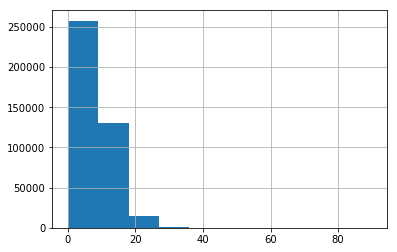

In [72]:
df.seq_question1.apply(lambda x: len(x)).hist()


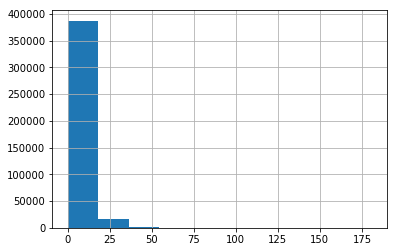

In [73]:
df.seq_question2.apply(lambda x: len(x)).hist()

In [74]:
#EMBEDDINGS MAX VALUE
#Base on the histograms, we select the next lengths
MAX_Q1_SEQ = 40
MAX_Q2_SEQ = 50


In [75]:
MAX_TEXT = np.max([np.max(df.seq_question1.max()),np.max(df.seq_question2.max())]) + 2
print(MAX_TEXT)

97906


In [76]:
target = df['is_duplicate']

In [77]:
from sklearn.cross_validation import train_test_split

#EXTRACT DEVELOPTMENT TEST
dtrain, dvalid = train_test_split(df, random_state=123, train_size=0.75)
print(dtrain.shape)
print(dvalid.shape)

(303217, 5)
(101073, 5)


In [78]:
from keras.preprocessing.sequence import pad_sequences
def get_keras_data(dataset):
    X = {
        'q1': pad_sequences(dataset.seq_question1, maxlen=MAX_Q1_SEQ),
        'q2': pad_sequences(dataset.seq_question2, maxlen=MAX_Q2_SEQ)
        
    }
    return X

X_train = get_keras_data(dtrain)
X_valid = get_keras_data(dvalid)


In [80]:
X_train['q1'].shape

(303217, 40)

In [91]:
from keras.layers import Input, Dropout, Dense, BatchNormalization, Activation, concatenate, GRU, Embedding, Flatten, BatchNormalization
from keras.models import Model
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras import backend as K
from keras import optimizers
def get_model():
    dropout_r = 0.1
    q1 = Input(shape=[X_train["q1"].shape[1]], name="q1")
    q2 = Input(shape=[X_train["q2"].shape[1]], name="q2")
    emb_q1 = Embedding(MAX_TEXT, 50)(q1)
    emb_q2 = Embedding(MAX_TEXT,50)(q2)
    rnn_layer1 = GRU(8) (emb_q1)
    rnn_layer2 = GRU(16) (emb_q2)
    main_l = concatenate([rnn_layer1, rnn_layer2])
    main_l = Dropout(dropout_r) (Dense(128) (main_l))
    main_l = Dropout(dropout_r) (Dense(64) (main_l))
    output = Dense(1, activation="sigmoid") (main_l)
    
    model = Model([q1,q2],output)
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
    return model

In [92]:
model = get_model()


In [93]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
q1 (InputLayer)                 (None, 40)           0                                            
__________________________________________________________________________________________________
q2 (InputLayer)                 (None, 50)           0                                            
__________________________________________________________________________________________________
embedding_11 (Embedding)        (None, 40, 50)       4895300     q1[0][0]                         
__________________________________________________________________________________________________
embedding_12 (Embedding)        (None, 50, 50)       4895300     q2[0][0]                         
__________________________________________________________________________________________________
gru_11 (GR

In [96]:
#FITTING THE MODEL
BATCH_SIZE = 20000
epochs = 5

model.fit(X_train, dtrain.is_duplicate, epochs=epochs, batch_size=BATCH_SIZE
          , validation_data=(X_valid, dvalid.is_duplicate)
          , verbose=1)

Train on 303217 samples, validate on 101073 samples
Epoch 1/5
303217/303217 [==============================] - 151s 499us/step - loss: 0.6595 - acc: 0.6224 - val_loss: 0.6243 - val_acc: 0.6360
Epoch 2/5
303217/303217 [==============================] - 111s 365us/step - loss: 0.5731 - acc: 0.7066 - val_loss: 0.5617 - val_acc: 0.7295
Epoch 3/5
303217/303217 [==============================] - 111s 367us/step - loss: 0.5098 - acc: 0.7551 - val_loss: 0.5339 - val_acc: 0.7435
Epoch 4/5
303217/303217 [==============================] - 114s 375us/step - loss: 0.4667 - acc: 0.7794 - val_loss: 0.5329 - val_acc: 0.7483
Epoch 5/5
303217/303217 [==============================] - 125s 413us/step - loss: 0.4312 - acc: 0.7990 - val_loss: 0.5373 - val_acc: 0.7491


In [97]:
#EVLUEATE THE MODEL ON DEV TEST: What is it doing?
val_preds = model.predict(X_valid)

In [99]:
y_classes = val_preds.argmax(axis=-1)

In [100]:
y_classes

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [102]:
df.shape

(404290, 5)

In [104]:
dtrain.shape

(303217, 5)

In [105]:
dvalid.shape

(101073, 5)

In [110]:
val_preds_x_train = model.predict(X_train)

In [124]:
X_final = get_keras_data(df)

In [125]:
y_final_preds = model.predict(X_final)

In [132]:
y_final_classes = np.argmax(y_final_preds,axis=1)

In [136]:
df['predictions_probs'] = y_final_preds

In [138]:
def update_score(row):
    row['results'] = 1 if row['predictions_probs'] > 0.3 else 0
    return row

In [159]:
df['results'] = df['predictions_probs'].apply(lambda x: 1 if x > 0.5 else 0)

In [160]:
df.loc[(df['results']== 1) & (df['is_duplicate'] == 0)]

,question1,question2,is_duplicate,seq_question1,seq_question2,predictions,predictions_probs,results
9,motorola company can i hack my charter motorol...,how do i hack motorola dcx free internet,0,"[6599, 157, 6, 2, 403, 9, 7673, 54514, 41036]","[1, 4, 2, 403, 6599, 41036, 143, 320]",0,0.872880,1
10,method find separation slits using fresnel bip...,are some things technicians can tell durabilit...,0,"[907, 69, 4492, 30371, 120, 30372, 54515]","[5, 15, 96, 16769, 6, 232, 16178, 13040, 1740,...",0,0.685111,1
22,are questions should not ask on quora,question should i ask on quora,0,"[5, 97, 19, 32, 171, 12, 39]","[145, 19, 2, 171, 12, 39]",0,0.661586,1
28,best way make money online,best way ask money online,0,"[10, 38, 37, 49, 73]","[10, 38, 171, 49, 73]",0,0.915489,1
30,whats one thing you would like do better,whats one thing you do despite knowing better,0,"[55, 34, 136, 7, 30, 27, 4, 76]","[55, 34, 136, 7, 4, 1876, 1553, 76]",0,0.847040,1
36,im yearold how can i improve my skills should ...,i am year old guy how can i become billionaire...,0,"[111, 1394, 1, 6, 2, 119, 9, 294, 19, 2, 4, 72...","[2, 56, 87, 130, 253, 1, 6, 2, 72, 2760, 3, 30...",0,0.696536,1
45,quickest way increase instagram followers,how can we increase our number instagram follo...,0,"[3174, 38, 184, 151, 948]","[1, 6, 36, 184, 179, 116, 151, 948]",0,0.894277,1
54,how gst affects cas tax officers,why cant i do my homework,0,"[1, 1163, 3851, 15509, 635, 1987]","[8, 191, 2, 4, 9, 6295]",0,0.635375,1
59,are best ways learn french,how do i learn french genders,0,"[5, 10, 103, 54, 955]","[1, 4, 2, 54, 955, 7533]",0,0.763403,1
63,why do i always get depressed,why do i always get depressed in evening,0,"[8, 4, 2, 358, 18, 1655]","[8, 4, 2, 358, 18, 1655, 3, 3775]",0,0.744217,1


In [161]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score
cm = confusion_matrix(df['is_duplicate'], df['results'])

In [162]:
cm

array([[216947,  38080],
       [ 43992, 105271]], dtype=int64)

In [163]:
Total = cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]
Accuracy = (cm[0][0] + cm[1][1])/Total
print("Accuracy %.2f" %(Accuracy*100))

Accuracy 79.70


In [164]:
Acc = accuracy_score(df['is_duplicate'], df['results'])

In [165]:
f1 = f1_score(df['is_duplicate'], df['results'])
print(f1)

0.719521280595


In [166]:
recall = recall_score(df['is_duplicate'], df['results'])
print(recall)

0.705271902615
